In [1]:
import requests
r = requests.get('https://zenodo.org/api/records/1188976')
with open("download.txt", "w+") as f:
    for file in r.json()["files"]:
        aLink=(file["links"]["self"])
        f.write(aLink+"\n")

!sudo apt-get install -y aria2
!aria2c -i download.txt -d ./dataset
!unzip "/content/SharedDatasets/dataset/*" -d ./unzipped/

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libc-ares2
The following NEW packages will be installed:
  aria2 libc-ares2
0 upgraded, 2 newly installed, 0 to remove and 25 not upgraded.
Need to get 1,274 kB of archives.
After this operation, 4,912 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libc-ares2 amd64 1.14.0-1 [37.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 aria2 amd64 1.33.1-1 [1,236 kB]
Fetched 1,274 kB in 1s (1,487 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back t

In [2]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [0]:
#!mkdir ./drive/My\ Drive/SharedDatasets/

In [0]:
#!mv ./dataset ./drive/My\ Drive/SharedDatasets/

In [0]:
#!mkdir ./drive/My\ Drive/SharedDatasets/unzipped

In [0]:
#!cp -r ./drive/My\ Drive/SharedDatasets/unzipped ./

In [0]:
#!cp -r ./drive/My\ Drive/SharedDatasets/  ./dataset

In [0]:
!mkdir /content/unzipped

In [7]:
!unzip "/content/dataset/*" -d /content/unzipped/

Streaming output truncated to the last 5000 lines.
  inflating: /content/unzipped/Actor_13/03-02-04-02-02-02-13.wav  
  inflating: /content/unzipped/Actor_13/03-02-05-01-01-01-13.wav  
  inflating: /content/unzipped/Actor_13/03-02-05-01-01-02-13.wav  
  inflating: /content/unzipped/Actor_13/03-02-05-01-02-01-13.wav  
  inflating: /content/unzipped/Actor_13/03-02-05-01-02-02-13.wav  
  inflating: /content/unzipped/Actor_13/03-02-05-02-01-01-13.wav  
  inflating: /content/unzipped/Actor_13/03-02-05-02-01-02-13.wav  
  inflating: /content/unzipped/Actor_13/03-02-05-02-02-01-13.wav  
  inflating: /content/unzipped/Actor_13/03-02-05-02-02-02-13.wav  
  inflating: /content/unzipped/Actor_13/03-02-06-01-01-01-13.wav  
  inflating: /content/unzipped/Actor_13/03-02-06-01-01-02-13.wav  
  inflating: /content/unzipped/Actor_13/03-02-06-01-02-01-13.wav  
  inflating: /content/unzipped/Actor_13/03-02-06-01-02-02-13.wav  
  inflating: /content/unzipped/Actor_13/03-02-06-02-01-01-13.wav  
  inflating

In [8]:
!bash

bash: cannot set terminal process group (121): Inappropriate ioctl for device
bash: no job control in this shell
y -map 0:a "encoded/${f%.*}.wav"
bash: !for: event not found
 -map 0:a "encoded/${f%.*}.wav"
> exit
> ls
> 
]0;root@2552c5f5fb76: /contentroot@2552c5f5fb76:/content# 
]0;root@2552c5f5fb76: /contentroot@2552c5f5fb76:/content# exit
exit


In [0]:

!for f in unzipped/*/*.mp4; do ffmpeg -i "$f" -c copy -map 0:a "encoded/${f%.*}.wav";

/bin/bash: -c: line 1: syntax error: unexpected end of file


In [10]:
!pip install speechpy

In [11]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import scipy.io.wavfile as wav
from speechpy.feature import mfcc
import librosa
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow import keras
from keras.utils import np_utils
from sklearn.utils.multiclass import unique_labels

Using TensorFlow backend.


In [0]:
FILEPATH = "/content/unzipped"
dir_list = os.listdir(FILEPATH)

In [14]:
#get the paths
dirts = []
filepath_delete = True
for root, dirt,file in os.walk(FILEPATH):
    if filepath_delete == True:
        print(root, "hahaha")
        filepath_delete = False
    else:
        dirts.append(root) 

/content/unzipped hahaha


In [0]:
files = []
for dirt in dirts:
    for root, dt, file in os.walk(dirt):
        for fl in file:
            if fl[-4:] == '.wav':
                files.append(os.path.join(dirt,fl))  

In [20]:
files[1]

'/content/unzipped/Actor_09/03-02-02-01-02-01-09.wav'

In [0]:
filename = []
Actor = []
for file in files:
    filename.append(file.split('/')[-1])
    # Actor.append(file.split('/')[-2])

In [22]:
filename[1]

'03-02-02-01-02-01-09.wav'

In [23]:
Actor[1]

'Actor_09'

In [0]:
Modality = []
Vocal_channel = []
Emotion = []
Emotional_intensity = []
Statement = []
Repetition = []
Actor = []

for name in filename:
    Modality.append(name.split('-')[0])
    Vocal_channel.append(name.split('-')[1])
    Emotion.append(int(name.split('-')[2])-1)
    Emotional_intensity.append(name.split('-')[3])
    Statement.append(name.split('-')[4])
    Repetition.append(name.split('-')[5])
    Actor.append(int(name.split('-')[6][:-4])-1)

In [29]:
np.unique(Actor)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [0]:
df = pd.DataFrame({'files': files, 
                   'modalities': Modality,
                   'vocal_channels': Vocal_channel, 
                   'emotions': Emotion,
                   'emotional_intensities': Emotional_intensity,
                   'statements': Statement,
                   'repetitiona': Repetition})

In [31]:
df.head(1)

,files,modalities,vocal_channels,emotions,emotional_intensities,statements,repetitiona
0,/content/unzipped/Actor_09/03-01-07-02-01-02-0...,03,01,6,02,01,02


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   files                  2452 non-null   object
 1   modalities             2452 non-null   object
 2   vocal_channels         2452 non-null   object
 3   emotions               2452 non-null   int64 
 4   emotional_intensities  2452 non-null   object
 5   statements             2452 non-null   object
 6   repetitiona            2452 non-null   object
dtypes: int64(1), object(6)
memory usage: 134.2+ KB


In [35]:
df.emotions.value_counts()

5    376
3    376
1    376
4    376
2    376
7    192
6    192
0    188
Name: emotions, dtype: int64

(array([188., 376., 376.,   0., 376., 376.,   0., 376., 192., 192.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

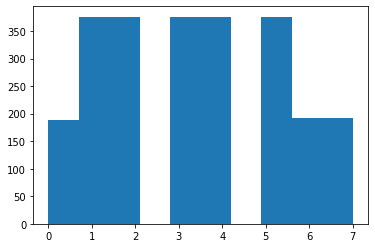

In [36]:
plt.hist(df.emotions)

In [37]:
print(len(files))

2452


In [0]:
mean_signal_length = 0
signals = []
for fname in files:
    signal, fs = librosa.load(fname, sr=16000, mono=True)
    mean_signal_length += len(signal)
    signals.append(signal)
mean_signal_length = mean_signal_length/(len(files))

In [44]:
print(mean_signal_length)

65474.77691680261


In [45]:
mean_signal_length = int(mean_signal_length)
print(mean_signal_length)

65474


In [0]:
def get_feature_vector_from_mfcc(signal, mean_signal_length: int, flatten: bool) -> np.ndarray:
    """
    Make feature vector from MFCC for the given wav file.

    Args:
        file_path (str): path to the .wav file that needs to be read.
        flatten (bool) : Boolean indicating whether to flatten mfcc obtained.
        mfcc_len (int): Number of cepestral co efficients to be consider.

    Returns:
        numpy.ndarray: feature vector of the wav file made from mfcc.
    """
    #fs, signal = wav.read(file_path)
    #signal, fs = librosa.load(file_path, sr=16000, mono=True)
    s_len = len(signal)

    # pad the signals to have same size if lesser than required
    # else slice them    
    
    if s_len < mean_signal_length:
        pad_len = mean_signal_length - s_len
        pad_rem = pad_len % 2
        pad_len //= 2
        signal = np.pad(signal, (pad_len, pad_len + pad_rem),
                        'constant', constant_values=0)
    else:
        pad_len = s_len - mean_signal_length
        pad_len //= 2
        signal = signal[pad_len:pad_len + mean_signal_length]
        
    # sample/frame = mean_signal_length*frame_length
    mel_coefficients = mfcc(signal, fs, frame_length=0.048, frame_stride=0.024, num_filters=30, num_cepstral=30, low_frequency=60, high_frequency=7600)
    if flatten:
        # Flatten the data
        mel_coefficients = np.ravel(mel_coefficients)
    return mel_coefficients

In [0]:
features = []
for signal in signals:
    features.append(get_feature_vector_from_mfcc(signal, mean_signal_length, flatten=False))

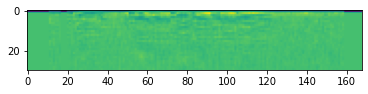

In [48]:
plt.imshow(features[0].T)

In [49]:
#need to stack these features, so need to add one demenssion
features = np.vstack([feature[np.newaxis, :, :] for feature in features])
features.shape

(2452, 168, 30)

In [0]:
#one hot code, it is classification not logistic regression, so change numbers to one hot code
labels = np_utils.to_categorical(Emotion)

In [51]:
labels.shape

(2452, 8)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [0]:
def build_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.LSTM(128, input_shape=(input_shape[0], input_shape[1])))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(16, activation='tanh'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

In [0]:
model = build_model(input_shape=(features.shape[1], features.shape[2]), num_classes=labels.shape[1])

In [0]:
lr_reducer = ReduceLROnPlateau(monitor='val_loss', 
                               factor=0.2,
                               patience=5,
                               min_lr=1e-6,
                               verbose=1)

In [56]:
hist = model.fit(x_train, y_train, batch_size=32, epochs=34, validation_data=(x_test, y_test), callbacks=[lr_reducer])

Epoch 1/34
62/62 [==============================] - 11s 179ms/step - loss: 2.1310 - accuracy: 0.1673 - val_loss: 1.9792 - val_accuracy: 0.2016 - lr: 0.0010
Epoch 2/34
62/62 [==============================] - 10s 163ms/step - loss: 1.9722 - accuracy: 0.2188 - val_loss: 1.9569 - val_accuracy: 0.2179 - lr: 0.0010
Epoch 3/34
62/62 [==============================] - 10s 164ms/step - loss: 1.8511 - accuracy: 0.2483 - val_loss: 1.8087 - val_accuracy: 0.2790 - lr: 0.0010
Epoch 4/34
62/62 [==============================] - 10s 163ms/step - loss: 1.7810 - accuracy: 0.3065 - val_loss: 1.7894 - val_accuracy: 0.3035 - lr: 0.0010
Epoch 5/34
62/62 [==============================] - 10s 165ms/step - loss: 1.7129 - accuracy: 0.3213 - val_loss: 1.7682 - val_accuracy: 0.3279 - lr: 0.0010
Epoch 6/34
62/62 [==============================] - 10s 166ms/step - loss: 1.6736 - accuracy: 0.3320 - val_loss: 1.5963 - val_accuracy: 0.3707 - lr: 0.0010
Epoch 7/34
62/62 [==============================] - 11s 174ms/st

In [0]:
def draw_hist(hist):
    acc = hist.history['accuracy']
    val_acc = hist.history['val_accuracy']
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # "bo" is for "blue dot"
    plt.figure(figsize=(8, 4.5))
    plt.plot(epochs, loss, 'bo', label='Training loss')
    # b is for "solid blue line"
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.clf()   # clear figure
    acc_values = acc
    val_acc_values = val_acc

    plt.figure(figsize=(8, 4.5))
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [0]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data

    print('unique labels:', unique_labels(y_true, y_pred))
    classes = np.array(classes)[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    fig, ax = plt.subplots()
    fig.set_figheight(9)
    fig.set_figwidth(9)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

0.9654172658920288 0.7189409136772156
Classification report: 
              precision    recall  f1-score   support

           0       0.74      0.63      0.68        41
           1       0.85      0.73      0.79        83
           2       0.64      0.70      0.67        61
           3       0.76      0.62      0.68        73
           4       0.83      0.82      0.83        72
           5       0.59      0.84      0.69        86
           6       0.71      0.76      0.73        29
           7       0.74      0.54      0.62        46

    accuracy                           0.72       491
   macro avg       0.73      0.71      0.71       491
weighted avg       0.73      0.72      0.72       491

Confusion matrix: 
[[26  4  4  3  1  0  1  2]
 [ 7 61  7  5  0  1  1  1]
 [ 0  0 43  0  1 12  0  5]
 [ 0  7  2 45  1 16  1  1]
 [ 0  0  5  1 59  5  2  0]
 [ 0  0  5  4  1 72  4  0]
 [ 1  0  0  1  4  1 22  0]
 [ 1  0  1  0  4 15  0 25]]


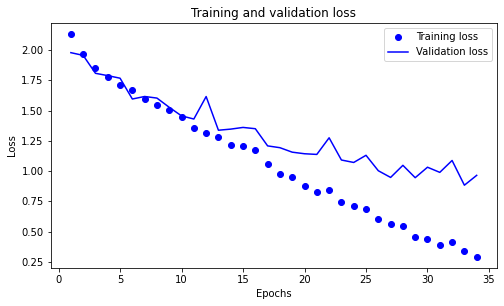

<Figure size 432x288 with 0 Axes>

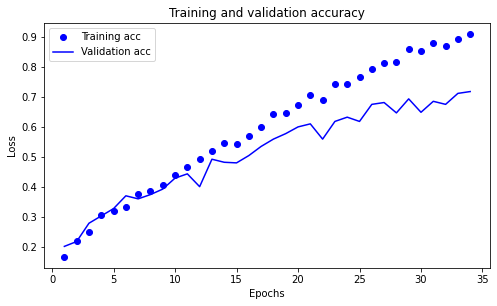

unique labels: [0 1 2 3 4 5 6 7]
Normalized confusion matrix


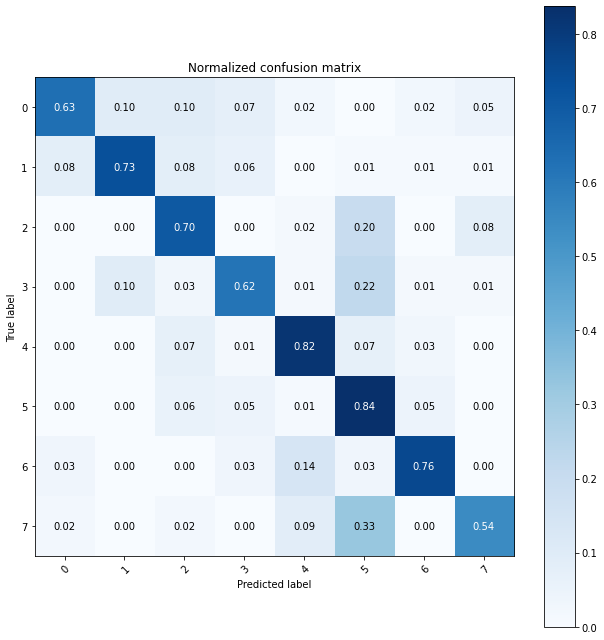

In [59]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(test_loss, test_acc)
pred_labels = model.predict(x_test)
print('Classification report: ')
print(classification_report(np.argmax(y_test, axis=1), np.argmax(pred_labels, axis=1)))
print('Confusion matrix: ')
print(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(pred_labels, axis=1)))
draw_hist(hist) 
plot_confusion_matrix(np.argmax(y_test, axis=1), np.argmax(pred_labels, axis=1), normalize=True, classes=[str(i) for i in range(10)])

# New Section